In [45]:
import numpy as np
import pandas as pd
import plotnine as p9
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

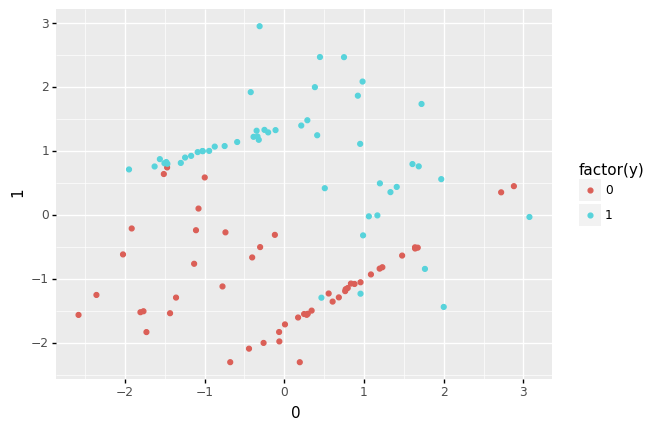

<ggplot: (313351605)>

In [54]:

X, y = make_classification(n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

components = pd.DataFrame({'0': X[:,0], '1': X[:,1], 'y': y}) # plotnine works with pd.DataFrame
(
p9.ggplot(components, p9.aes('0', '1'))
    + p9.geom_point(p9.aes(color='factor(y)'))
)

In [50]:
X.shape

(100, 20)

In [51]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

<AxesSubplot:ylabel='feature'>

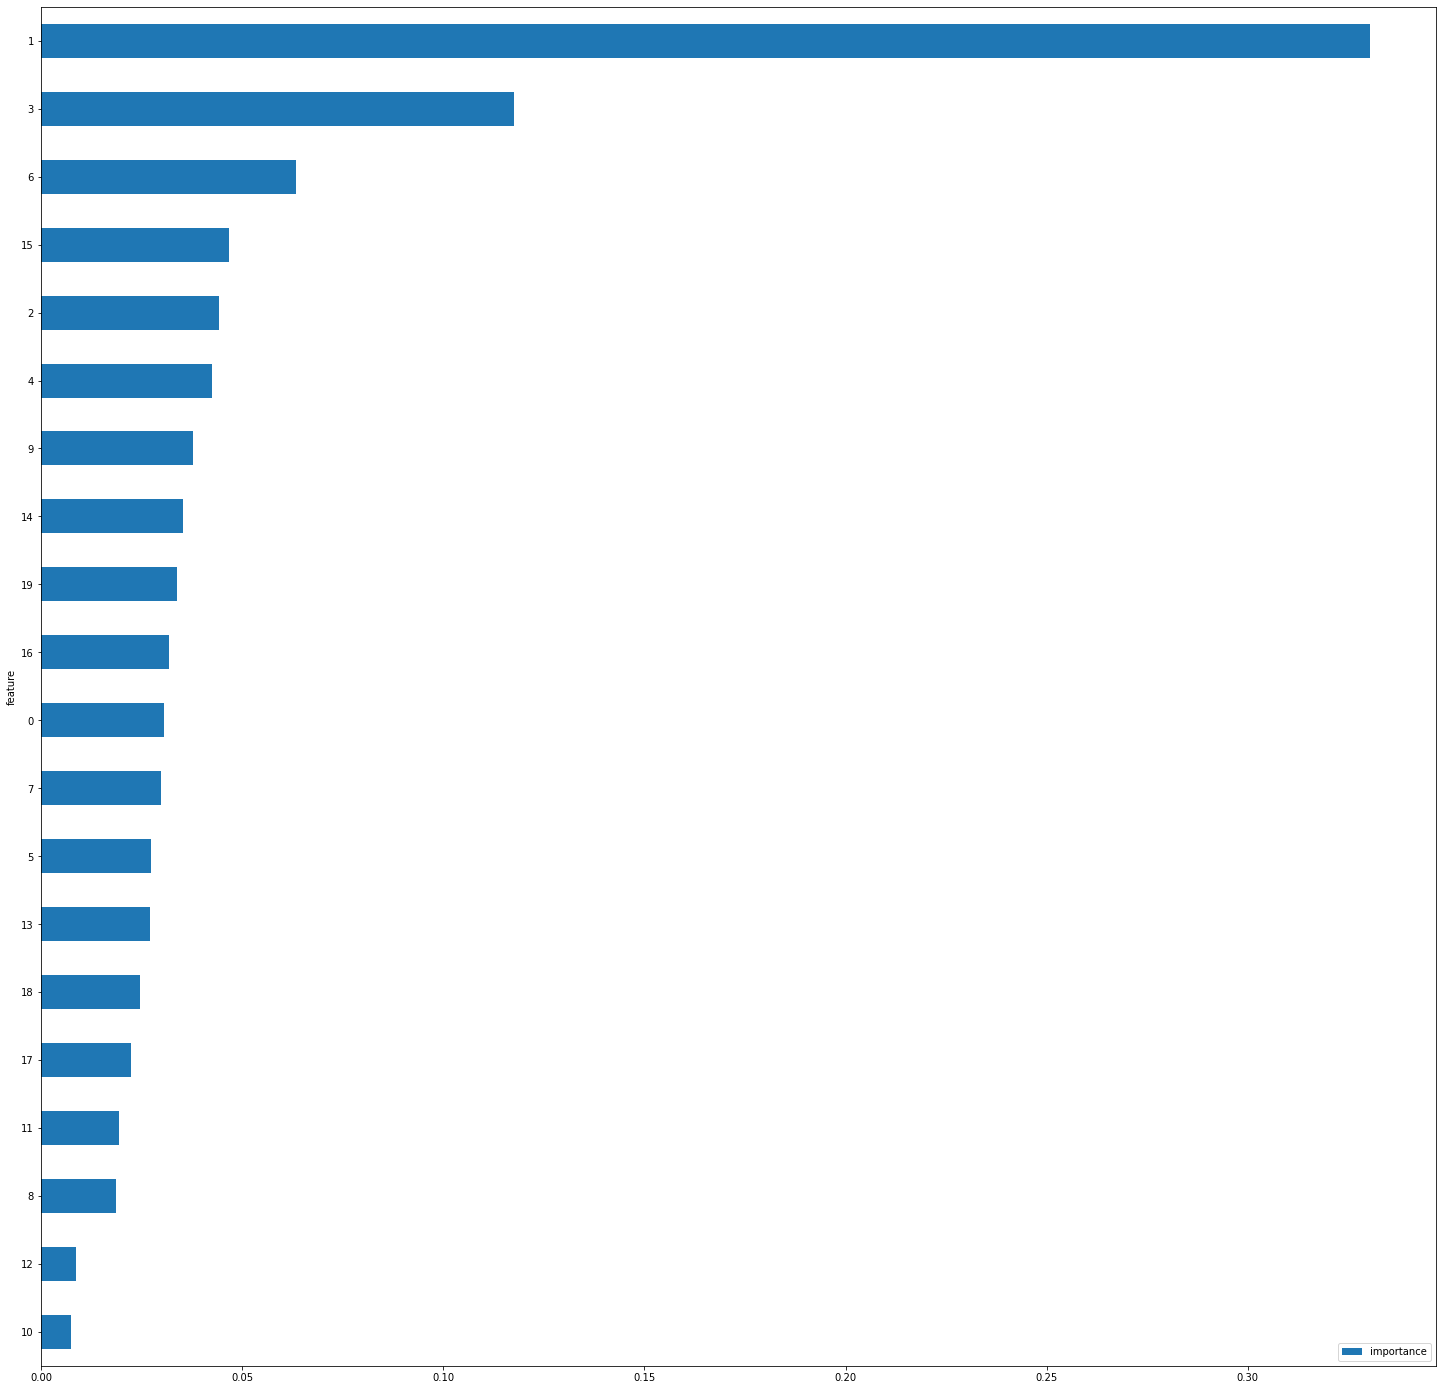

In [52]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = range(X_train.shape[1])
feature_importances['importance'] = clf.feature_importances_
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances.set_index('feature', inplace=True)

feature_importances.plot(kind='barh', figsize=(25, 25))

In [55]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
print(X_train.shape, X_test.shape)

(70, 3) (30, 3)


In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import svm

logreg = LogisticRegression(max_iter=1e5)
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
svc = svm.SVC()


models = [logreg, rf, gboost, svc]

In [60]:
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [61]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = np.mean(cross_val_score(model, X_train, y_train, cv=cross_validation, scoring='accuracy'))
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8857142857142858
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8714285714285713
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8714285714285716
****
Cross-validation of : <class 'sklearn.svm._classes.SVC'>
CV score = 0.8714285714285713
****


In [62]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8]}

rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cross_validation)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]})

Tuned parameters and score

In [63]:
print("Tuned Random Forest Parameters: {}".format(rfc_cv.best_params_))
print("Best score is {}".format(rfc_cv.best_score_))
print("Score on test data is {}".format(rfc_cv.score(X_test, y_test)))

Tuned Random Forest Parameters: {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}
Best score is 0.8571428571428571
Score on test data is 0.8666666666666667


In [40]:
from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
y_hat_test = rfc_cv.predict(X_test)
confusion_matrix(y_test, y_hat_test, labels=[0,1])

array([[14,  0],
       [ 2, 14]])

In [42]:
import matplotlib.pyplot as plt
from sklearn import metrics

Confusion matrix:
[[14  0]
 [ 2 14]]


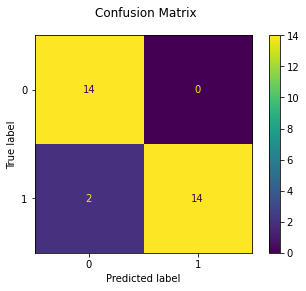

In [43]:
disp = metrics.plot_confusion_matrix(rfc_cv, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## MNIST handwritten digits

Based on sklearn documentation [example](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).

The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

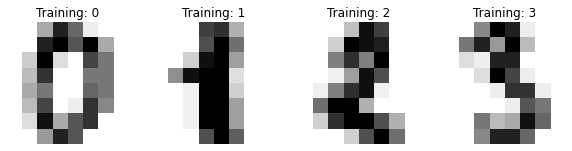

In [65]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [66]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

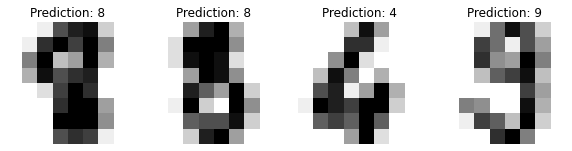

In [67]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [77]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


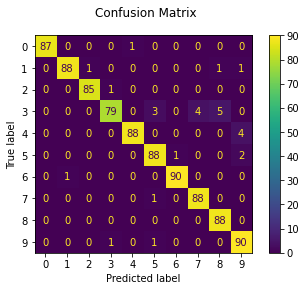

In [78]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()